In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv("../dataFiles/startups1.csv")
print(data)

    X1   X2   X3  Category   Y
0  2.5  3.5  4.0         A  25
1  3.0  4.0  4.5         B  30
2  2.8  3.8  4.2         A  28
3  3.5  4.5  5.0         C  35
4  3.2  4.2  4.7         B  32
5  3.8  4.8  5.2         C  38


In [91]:
# Extract the features (X) and target variable (y)
X = data[['X1', ' X2']].values
y = data[' Y'].values.reshape(-1, 1)

# Feature scaling (optional but recommended)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a column of ones for the bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]


In [92]:
learning_rate = 0.01
n_iterations = 1000

# Initialize coefficients
theta = np.random.rand(3, 1)  # 2 features + bias

# Perform gradient descent
for iteration in range(n_iterations):
    # Calculate predictions
    predictions = X_b.dot(theta)

    # Calculate the error
    error = predictions - y

    # Calculate gradients
    gradients = 2/len(y) * X_b.T.dot(error)

    # Update the coefficients using the gradients
    theta = theta - learning_rate * gradients

print("Final Coefficients:")
print(theta)

Final Coefficients:
[[31.33333328]
 [ 2.02190044]
 [ 2.28571555]]


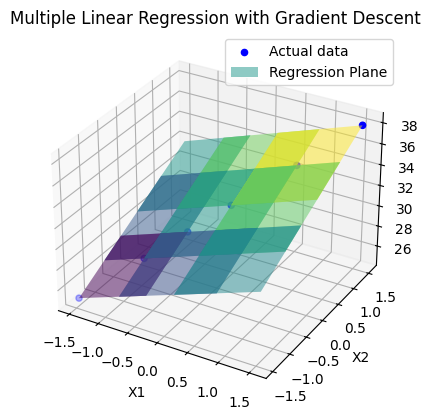

In [93]:
# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Actual data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Create a meshgrid for the plane
x1, x2 = np.meshgrid(X[:, 0], X[:, 1])
y = theta[0] + theta[1] * x1 + theta[2] * x2

# Plot the regression plane
ax.plot_surface(x1, x2, y, alpha=0.5, cmap='viridis', label='Regression Plane')


plt.title('Multiple Linear Regression with Gradient Descent')
plt.legend()
plt.show()